# Dataset Description and Methodology: Sales Forecasting for a Supermarket
The Sales Forecasting project aims to predict Item_Outlet_Sales for a supermarket using a variety of features related to the items and their respective outlets. This can help the supermarket forecast future sales, optimize stock levels, and make better business decisions based on past data.

Dataset Overview:
The dataset contains sales information for various items sold in different outlets of a supermarket. Each record represents a unique product with associated characteristics, such as its type, weight, and visibility, along with outlet-specific features.

Features:
The dataset consists of the following columns:

Item_Identifier: Unique identifier for each product item.

Item_Weight: Weight of the product item (in kg).

Item_Fat_Content: Categorized as 'Low Fat' or 'Regular', representing the fat content of the item.

Item_Visibility: The visibility of the item in the store, represented by a numeric value between 0 and 1.

Item_Type: The category or type of the item (e.g., Dairy, Meat, Fruits and Vegetables).

Item_MRP: Maximum Retail Price (MRP) of the item.

Outlet_Identifier: Unique identifier for each outlet (store).

Outlet_Establishment_Year: The year the outlet was established.

Outlet_Size: The size of the outlet (e.g., Small, Medium, High).

Outlet_Location_Type: The location of the outlet (e.g., Tier 1, Tier 2, Tier 3).

Outlet_Type: The type of outlet (e.g., Supermarket, Grocery Store).

Item_Outlet_Sales: The target variable, representing the sales of the item in the outlet.

In [12]:
import pandas as pd
df = pd.read_csv("sales_prediction.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df.shape

(8523, 12)

In [14]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Data Visulaization

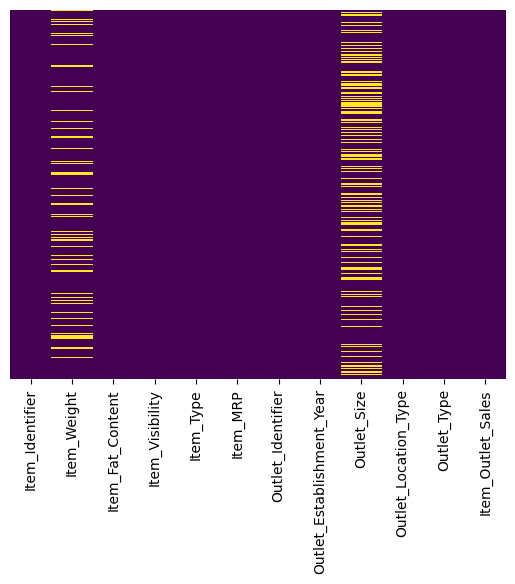

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

<AxesSubplot:>

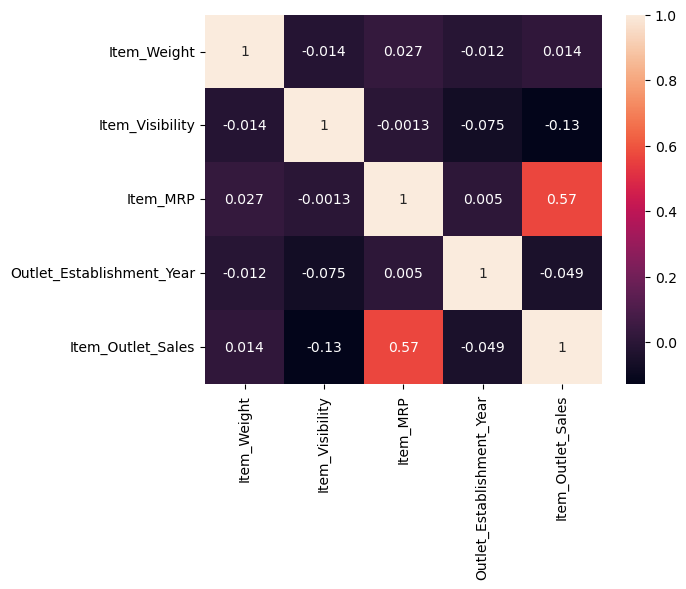

In [15]:
import seaborn as sns
corrmat = df.corr()
fig, ax = plt.subplots()
sns.heatmap(corrmat,annot=True)

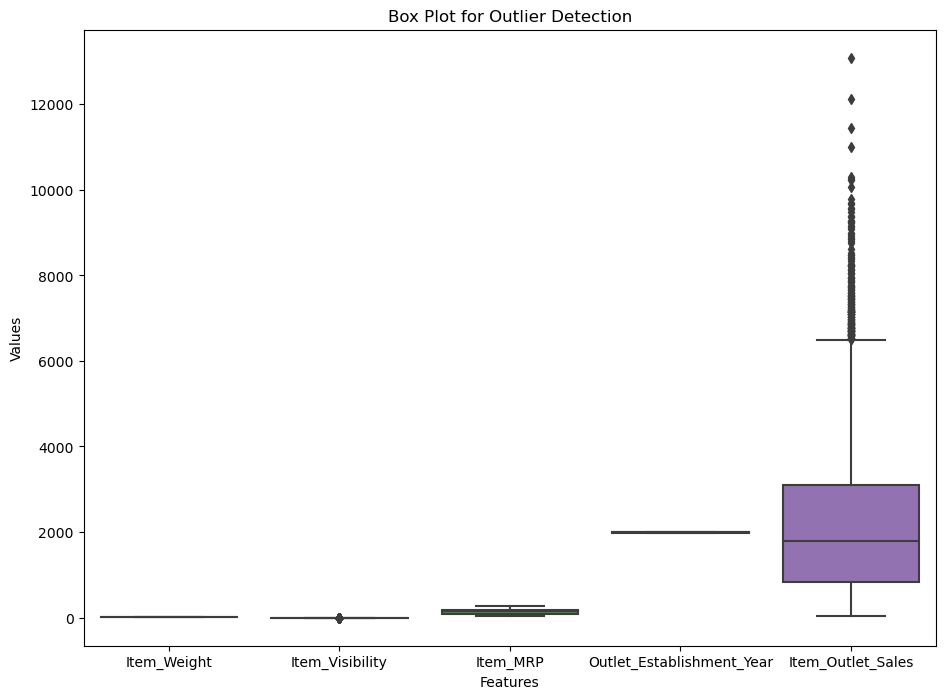

In [18]:
plt.figure(figsize=(11, 8))
sns.boxplot(data=df)
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

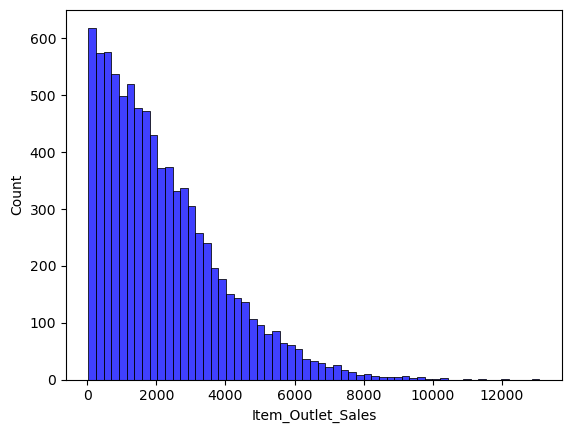

In [89]:
sns.histplot(data=df, x='Item_Outlet_Sales',color='blue')

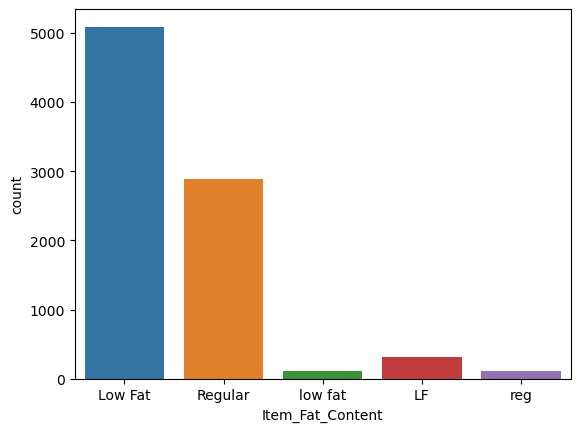

In [27]:
sns.countplot(data = df , x= 'Item_Fat_Content');

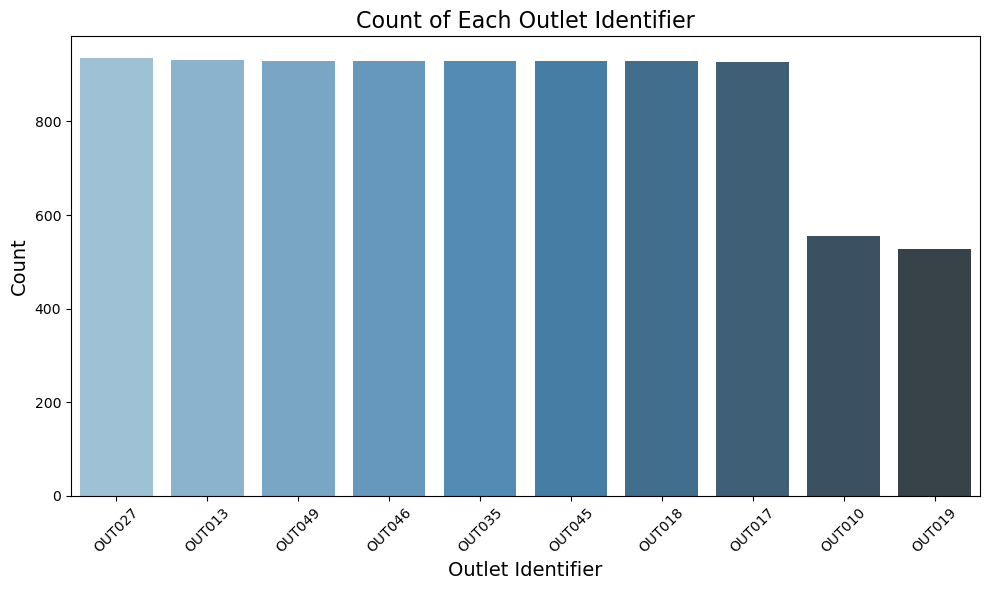

In [56]:
# Count the occurrences of each Outlet_Identifier
outlet_counts = df['Outlet_Identifier'].value_counts()

# Create a bar plot to visualize the count of each Outlet_Identifier
plt.figure(figsize=(10, 6))
sns.barplot(x=outlet_counts.index, y=outlet_counts.values, palette="Blues_d")

# Add labels and title
plt.title('Count of Each Outlet Identifier', fontsize=16)
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

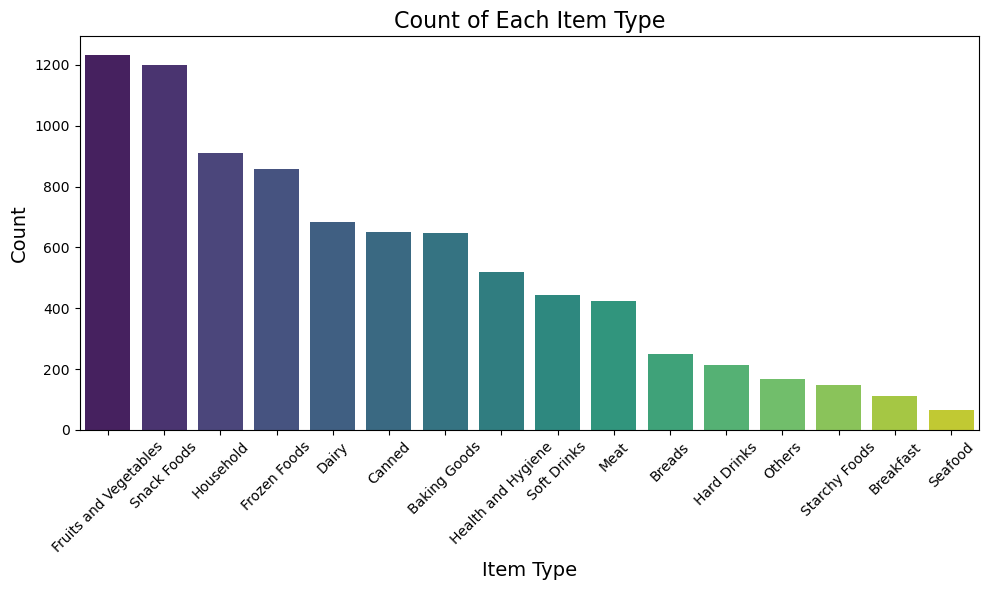

In [57]:
# Count the occurrences of each Item_Type
item_type_counts = df['Item_Type'].value_counts()

# Create a bar plot to visualize the count of each Item_Type
plt.figure(figsize=(10, 6))
sns.barplot(x=item_type_counts.index, y=item_type_counts.values, palette="viridis")

# Add labels and title
plt.title('Count of Each Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

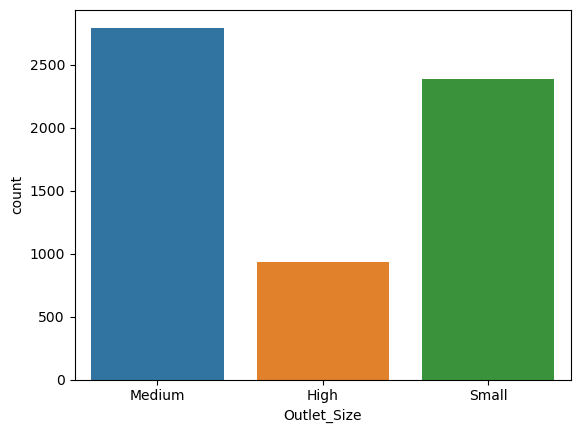

In [45]:
sns.countplot(data = df , x= 'Outlet_Size');

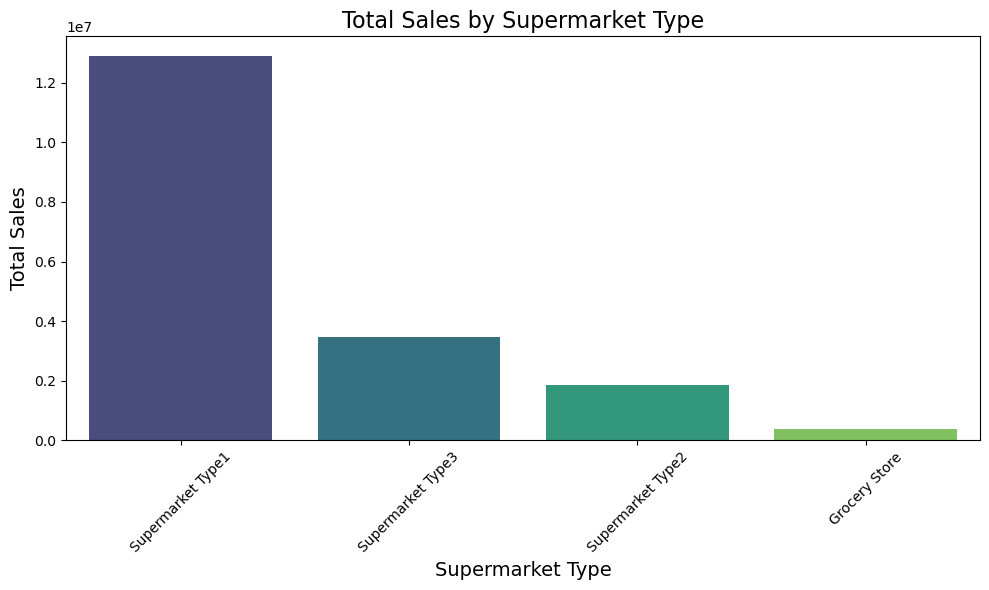

In [48]:
sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# Sort the result in descending order
sales_by_outlet_type_sorted = sales_by_outlet_type.sort_values(ascending=False)

# Create a bar plot to visualize the sales by outlet type
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_outlet_type_sorted.index, y=sales_by_outlet_type_sorted.values, palette="viridis")

# Add labels and title
plt.title('Total Sales by Supermarket Type', fontsize=16)
plt.xlabel('Supermarket Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

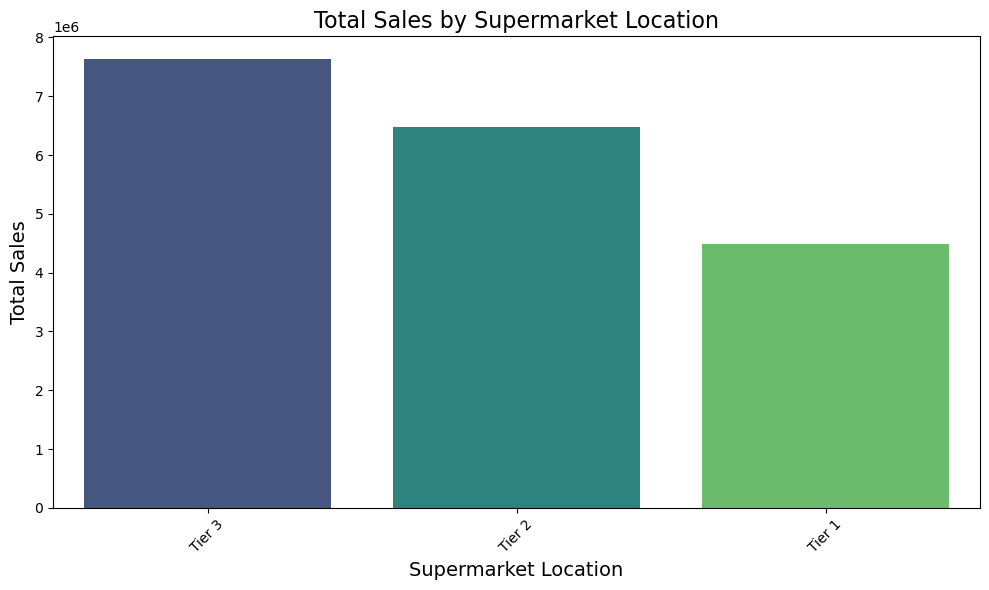

In [58]:
sales_by_outlet_type = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

# Sort the result in descending order
sales_by_outlet_type_sorted = sales_by_outlet_type.sort_values(ascending=False)

# Create a bar plot to visualize the sales by outlet type
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_outlet_type_sorted.index, y=sales_by_outlet_type_sorted.values, palette="viridis")

# Add labels and title
plt.title('Total Sales by Supermarket Location', fontsize=16)
plt.xlabel('Supermarket Location', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Total Sales')

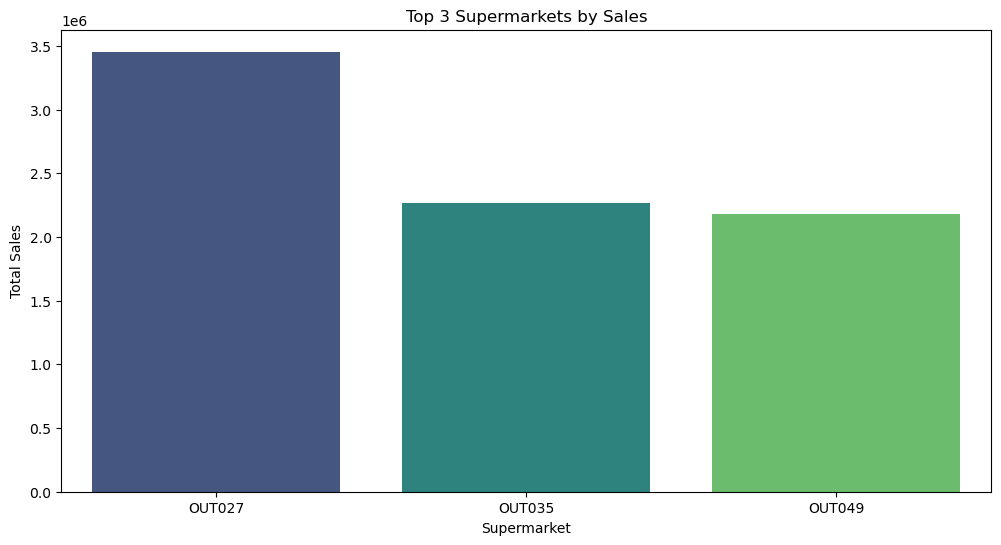

In [63]:
# Grouping by Outlet_Identifier to get total sales for each supermarket
top_supermarkets = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(3)

# Plotting the top 3 supermarkets by sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_supermarkets.index, y=top_supermarkets.values, palette='viridis')
plt.title('Top 3 Supermarkets by Sales')
plt.xlabel('Supermarket')
plt.ylabel('Total Sales')


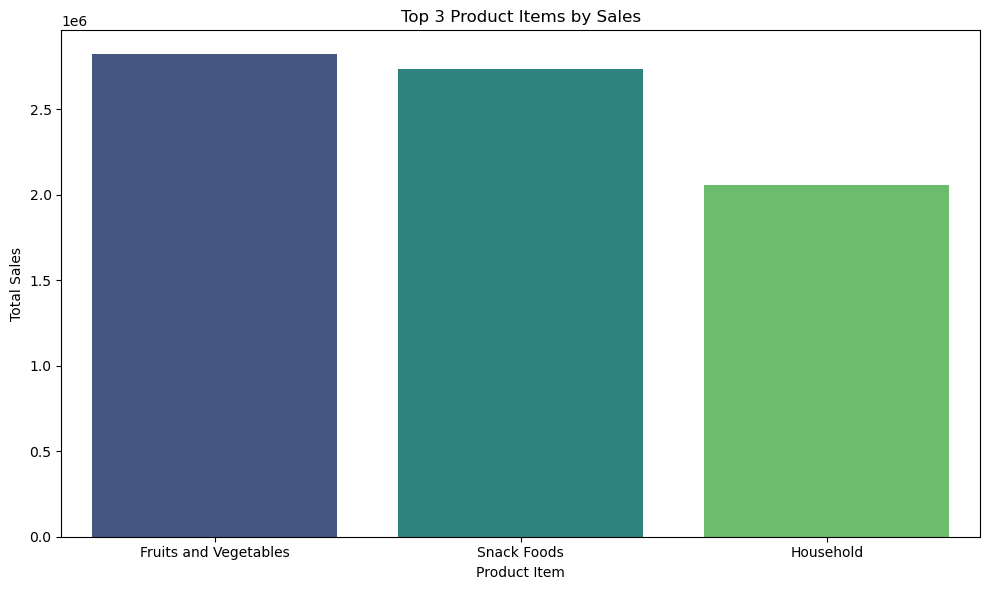

In [62]:
# Grouping by Item_Type to get total sales for each product type
top_items = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(3
# Plotting the top 3 items by sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.title('Top 3 Product Items by Sales')
plt.xlabel('Product Item')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Data Preproccesing

## Hanlde null values

In [18]:
import pandas as pd

def replace_and_drop_missing_weights(df):
    """
    Function to replace missing Item_Weight values with the weight from another row
    that shares the same Item_Identifier, and then drop rows that still have missing Item_Weight.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    
    Returns:
    pd.DataFrame: The cleaned dataframe with missing Item_Weight values replaced and rows with
                  remaining null values in Item_Weight dropped.
    """
    # Step 1: Print the number of missing values before any replacements or dropping
    missing_before = df['Item_Weight'].isnull().sum()
    print(f"Missing values before replacement and dropping: {missing_before}")
    
    # Step 2: Identify rows with missing Item_Weight
    missing_weight_df = df[df['Item_Weight'].isnull()]
    
    # Step 3: Replace missing Item_Weight with the same Item_Identifier from another row
    for idx, row in missing_weight_df.iterrows():
        item_id = row['Item_Identifier']
        
        # Check if there's a non-null Item_Weight for the same Item_Identifier in other rows
        matching_row = df[(df['Item_Identifier'] == item_id) & (df['Item_Weight'].notnull())]
        
        if not matching_row.empty:
            # Take the first matching Item_Weight and replace the missing one
            new_weight = matching_row['Item_Weight'].values[0]
            df.at[idx, 'Item_Weight'] = new_weight
    
    # Step 4: Print the number of missing values after replacement but before dropping
    missing_after_replace = df['Item_Weight'].isnull().sum()
    print(f"Missing values after replacement but before dropping: {missing_after_replace}")
    
    # Step 5: Drop rows that still have null values in Item_Weight
    df_cleaned = df.dropna(subset=['Item_Weight'])
    
    # Step 6: Print the number of missing values after dropping rows
    missing_after_drop = df_cleaned['Item_Weight'].isnull().sum()
    print(f"Missing values after dropping rows: {missing_after_drop}")
    
    return df_cleaned

# Apply the function to df
df = replace_and_drop_missing_weights(df)

# Check the cleaned dataframe
df.head() # To view the top rows of the cleaned DataFrame


Missing values before replacement and dropping: 1463
Missing values after replacement but before dropping: 4
Missing values after dropping rows: 0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
import pandas as pd

def replace_and_drop_missing_sizes(df):

    # Step 1: Print the number of missing values before any replacements or dropping
    missing_before = df['Outlet_Size'].isnull().sum()
    print(f"Missing values before replacement and dropping: {missing_before}")
    
    # Step 2: Identify rows with missing Outlet_Size
    missing_weight_df = df[df['Outlet_Size'].isnull()]
    
    # Step 3: Replace missing Outlet_Size with the same Item_Identifier from another row
    for idx, row in missing_weight_df.iterrows():
        item_id = row['Item_Identifier']
        
        # Check if there's a non-null Outlet_Size for the same Item_Identifier in other rows
        matching_row = df[(df['Item_Identifier'] == item_id) & (df['Outlet_Size'].notnull())]
        
        if not matching_row.empty:
            # Take the first matching Item_Weight and replace the missing one
            new_weight = matching_row['Outlet_Size'].values[0]
            df.at[idx, 'Outlet_Size'] = new_weight
    
    # Step 4: Print the number of missing values after replacement but before dropping
    missing_after_replace = df['Outlet_Size'].isnull().sum()
    print(f"Missing values after replacement but before dropping: {missing_after_replace}")
    
    # Step 5: Drop rows that still have null values in Outlet_Size
    df_cleaned = df.dropna(subset=['Outlet_Size'])
    
    # Step 6: Print the number of missing values after dropping rows
    missing_after_drop = df_cleaned['Outlet_Size'].isnull().sum()
    print(f"Missing values after dropping rows: {missing_after_drop}")
    
    return df_cleaned

# Apply the function to df
df = replace_and_drop_missing_sizes(df)

# Check the cleaned dataframe
df.head() # To view the top rows of the cleaned DataFrame


Missing values before replacement and dropping: 2410
Missing values after replacement but before dropping: 7
Missing values after dropping rows: 0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
df.shape

(8512, 12)

# Handle outlier

In [21]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Detect outliers
outliers = df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Lower Bound: -2564.6616000000004, Upper Bound: 6500.8712000000005
Number of outliers: 186


In [22]:
# Capping the outliers to the lower and upper bounds
df['Item_Outlet_Sales'] = np.where(
    df['Item_Outlet_Sales'] < lower_bound, 
    lower_bound, 
    np.where(df['Item_Outlet_Sales'] > upper_bound, upper_bound, df['Item_Outlet_Sales'])
)

# Verify the changes
print(f"After capping, number of outliers: {len(df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)])}")


After capping, number of outliers: 0


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

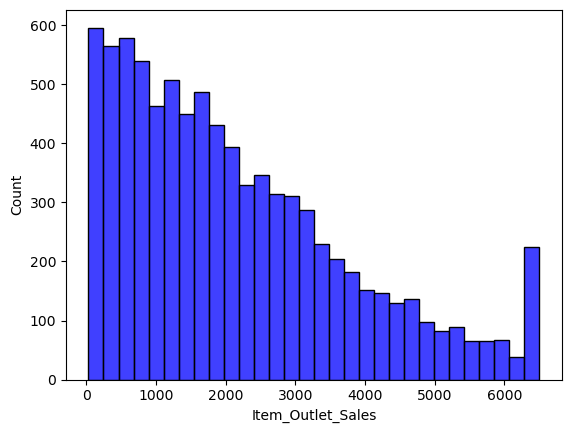

In [23]:
sns.histplot(data=df, x='Item_Outlet_Sales',color='blue')

In [24]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the age of the outlet
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

# Drop the 'Outlet_Establishment_Year' column
df = df.drop(columns=['Outlet_Establishment_Year'])

# Verify the update
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


In [25]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns as is
)

# Fit and transform the entire dataset X
X_encoded = preprocessor.fit_transform(X)

# Convert to DataFrame with meaningful column names
encoded_feature_names = preprocessor.get_feature_names_out()
X_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names, index=X.index)

In [69]:
#Spliting dataset into training set and test set i choose the test size to be 20% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1)

X_train.shape,X_test.shape

((6809, 1589), (1703, 1589))

In [74]:
# Train randomforest on training set and test set
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 400, max_depth=8, min_samples_split=10, min_samples_leaf=4,random_state=42)
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=400, random_state=42)

In [75]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


y_pred = RFR.predict(X_test)

# Evaluate the model
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = sqrt(mse)


# R-2 score on training and testing set
train_r2 = r2_score(y_train, RFR.predict(X_train))
test_r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics
print(f"R2 Score on Training Set: {train_r2}")
print(f"R2 Score on Testing Set: {test_r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2 Score on Training Set: 0.6701248474323929
R2 Score on Testing Set: 0.5986944321826817
Mean Squared Error (MSE): 1130516.0104455254
Root Mean Squared Error (RMSE): 1063.2572644687293


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, min_samples_split=10, min_samples_leaf=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
test_r2 = r2_score(y_test, y_pred)

print(f"R2 Score on Training Set: {train_r2}")
print(f"R2 Score on Testing Set: {test_r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R2 Score on Training Set: 0.6701248474323929
R2 Score on Testing Set: 0.5891741804677073
Mean Squared Error (MSE): 1157335.4663673267
Root Mean Squared Error (RMSE): 1075.7952715862468


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of iterations for random search
    cv=5,  # Cross-validation splits
    scoring='neg_mean_squared_error',  # Evaluation metric
    verbose=2,  # Log output
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Train the final model with the best parameters
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Mean Squared Error: 1131547.6560668077
Mean Absolute Error: 754.8956269086044
R2 Score: 0.5983282231878424
